### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.
coffee_red.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [3]:
coffee_full.shape

(2974, 4)

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [4]:
drink = coffee_red['drinks_coffee'].sum()
non_drink = coffee_red.query('drinks_coffee == False')['drinks_coffee'].count()
total = coffee_red['drinks_coffee'].count()

drink_ratio = drink / total
non_drink_ratio = non_drink / total
print(' The Proportion of Drinkers: {} \n The Proportions of Non Drinkers: {}'\
      .format(drink_ratio, non_drink_ratio))


 The Proportion of Drinkers: 0.595 
 The Proportions of Non Drinkers: 0.405


In [5]:
coffee_red['drinks_coffee'].mean(), drink

(0.595, 119)

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the 
average height?

In [14]:
height_drink = coffee_red[coffee_red['drinks_coffee'] == True]
height_drink_avg = height_drink['height'].mean()

height_non_drink = coffee_red[coffee_red['drinks_coffee'] == False]
height_non_drink_avg = height_non_drink['height'].mean()

print('Average Height of Drinker: {:.4f} \n Average Height of Non Drinkers: {:.4f}'\
      .format(height_drink_avg, height_non_drink_avg))

Average Height of Drinker: 68.1196 
 Average Height of Non Drinkers: 66.7849


`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [7]:
new_sample = coffee_red.sample(200, replace=True)

sam_dr = new_sample['drinks_coffee'].sum()
sam_non_dr = new_sample.query('drinks_coffee == False')['drinks_coffee'].count()

print('The Proportion of Sample Drinker: {} \n The Proportion of Sample Non Drinkers: {}'.format(sam_dr/200, sam_non_dr/200))

The Proportion of Sample Drinker: 0.605 
 The Proportion of Sample Non Drinkers: 0.395


`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [8]:
bootstrap_samples = []
for i in range(10000):
    sample = coffee_red.sample(200, replace=True)
    sample = sample[sample['drinks_coffee'] == False]['height'].mean()
    bootstrap_samples.append(sample)

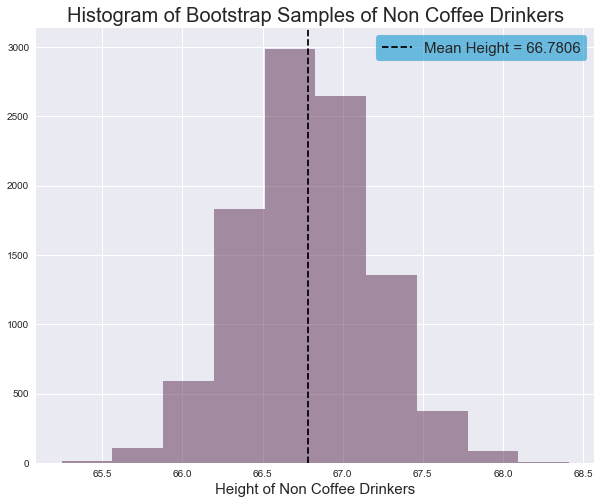

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

plt.figure(figsize=(10,8))
plt.hist(bootstrap_samples, color='#5C2D50', alpha=0.5)
plt.xlabel('Height of Non Coffee Drinkers', fontsize=15)
plt.title('Histogram of Bootstrap Samples of Non Coffee Drinkers', fontsize=20)
plt.axvline(np.mean(bootstrap_samples), linestyle='--', color='k', label='Mean Height = {:.4f}'\
            .format(np.mean(bootstrap_samples)))
plt.legend(frameon=True, fontsize=15, framealpha=0.6, facecolor='#1499D3');

In [10]:
ci = np.percentile(bootstrap_samples, [2.5, 97.5])
print('The Confidence Interval for Height of Non Coffee Drinkers is {} ---- {}'.format(ci[0], ci[1]))

The Confidence Interval for Height of Non Coffee Drinkers is 65.9929132815752 ---- 67.58402738281573


`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [11]:
pop_height_nondr = coffee_full.query('drinks_coffee == False')['height'].mean()
print('The Average Height of Non Coffee Drinkers in the Populatioin is {}'.format(pop_height_nondr))

The Average Height of Non Coffee Drinkers in the Populatioin is 66.44340776214705
